# Problem Statement

Model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. 

# Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
  bikes = pd.read_csv("C:/Users/Personal/Documents/AIML_Notebooks/ML1/Bikes/day.csv",low_memory = False) # Loan data

In [3]:
bikes.info() # no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
# Remove instant as it is row index
bikes = bikes.drop('instant',axis = 1)
bikes.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
cont = bikes[['temp','atemp','hum','windspeed','casual','registered','cnt']]

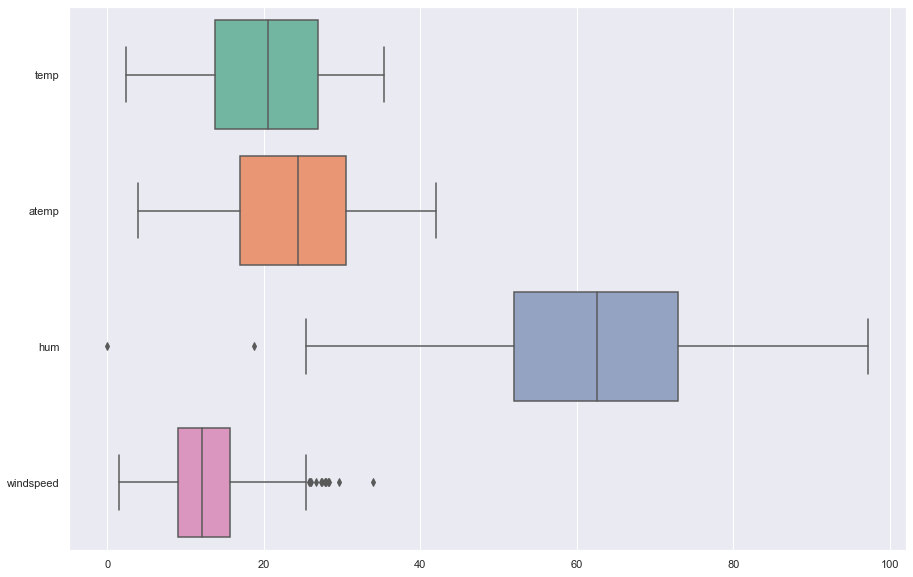

In [7]:
data1 = cont[['temp','atemp','hum','windspeed']]
sns.set(rc={'figure.figsize':(15, 10)})
sns.boxplot(data = data1,orient = "h", palette="Set2")
plt.show()

In [8]:
IQR_hum = np.percentile(bikes.hum,75) - np.percentile(bikes.hum,25)
len(bikes.hum[bikes['hum'] >= 1.5*IQR_hum]) # Remove outlier observations

720

In [9]:
## Remove outlier from hum
bikes = bikes[bikes.hum >= 1.5*IQR_hum]
bikes.shape

(720, 15)

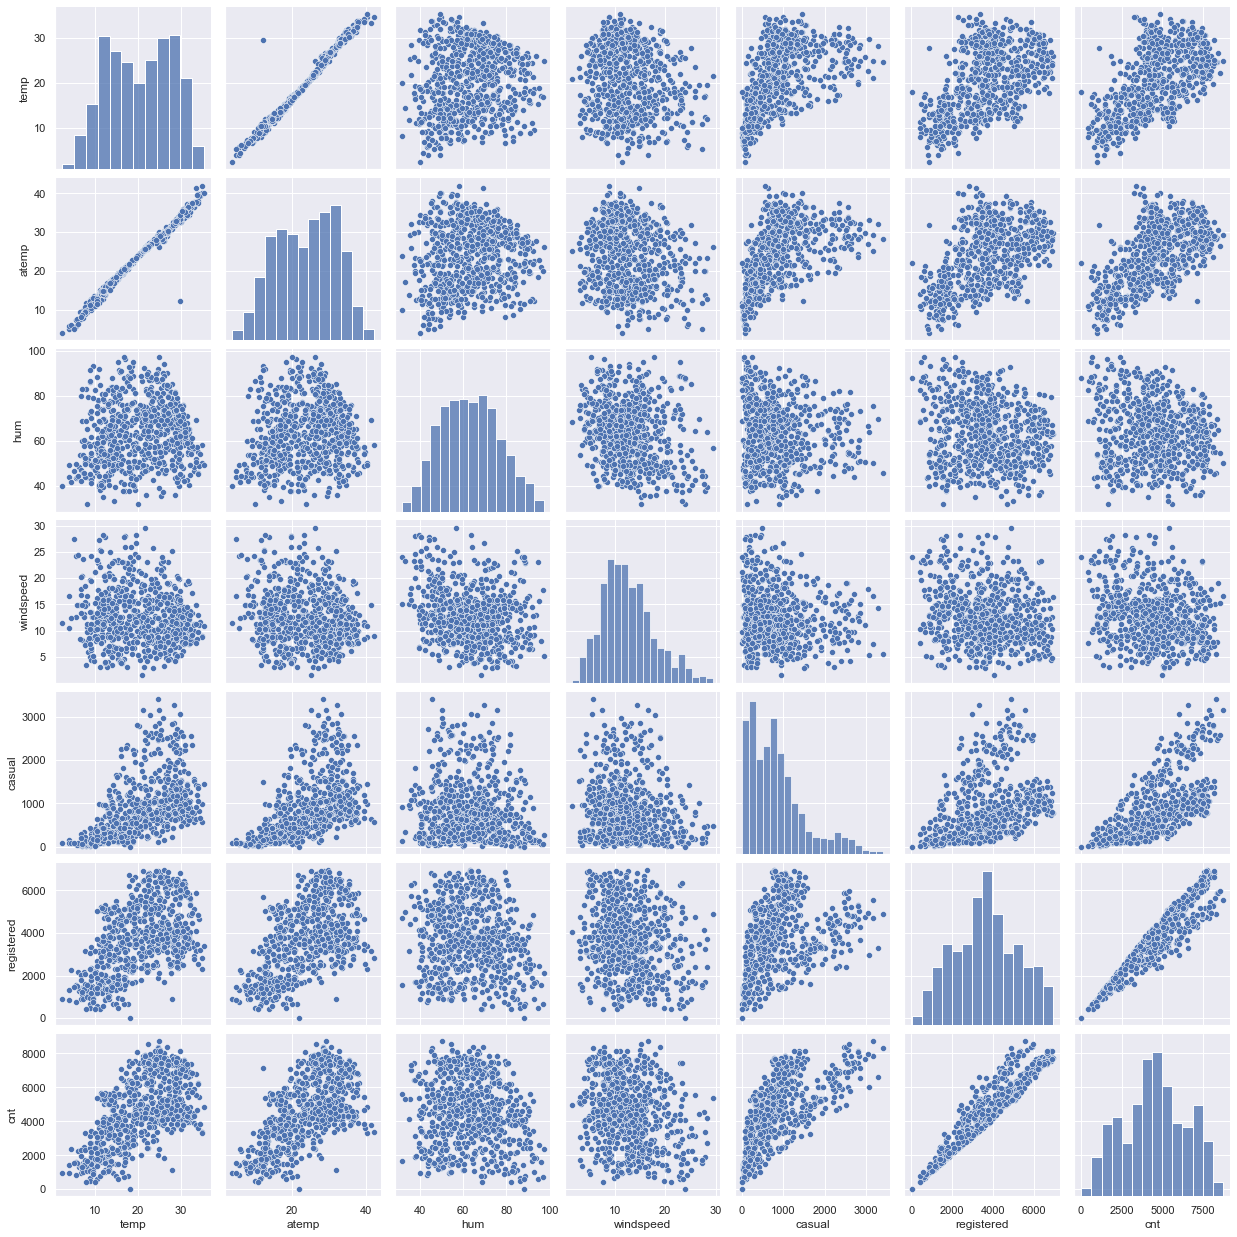

In [10]:
cont = bikes[['temp','atemp','hum','windspeed','casual','registered','cnt']]
sns.pairplot(cont)
plt.show()

Based on the pairplot, it can be seen that the target variable 'cnt' has a strong linear relationship with 'temp' and 'atemp'. Note that 'casual' and 'registered' contribute to 'cnt' hence are analyzed seperately. Since, 'temp' and 'atemp' are strongly correlated and 'atemp' shares almost identical distributions with other variables, one of these variables can be dropped based on further analysis.

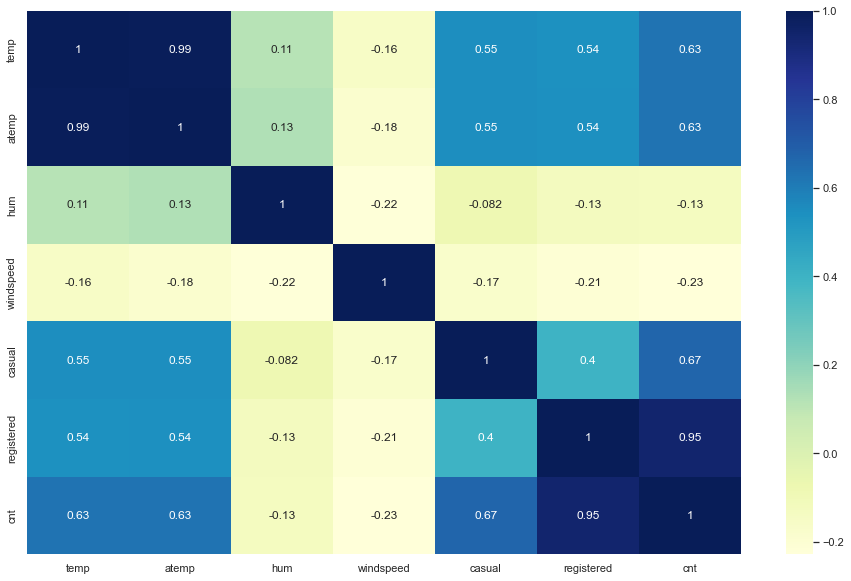

In [11]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(cont.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [12]:
# # Change numbers to string for some of the categorical variables

# # print(map(bikes['season'],{1:"spring",2:"summer",3:"fall",4:"winter"}))

# bikes.loc[bikes['season']==1,'season'] = "spring"
# bikes.loc[bikes['season']==2,'season'] = "summer"
# bikes.loc[bikes['season']==3,'season'] = "fall"
# bikes.loc[bikes['season']==4,'season'] = "winter"

In [13]:
# def binary_map(x,input1, input2):
#     return x.map({0: input1, 1: input2})

In [14]:
# bikes.loc[bikes['yr']==0,'yr'] = "2018"
# bikes.loc[bikes['yr']==1,'yr'] = "2019"


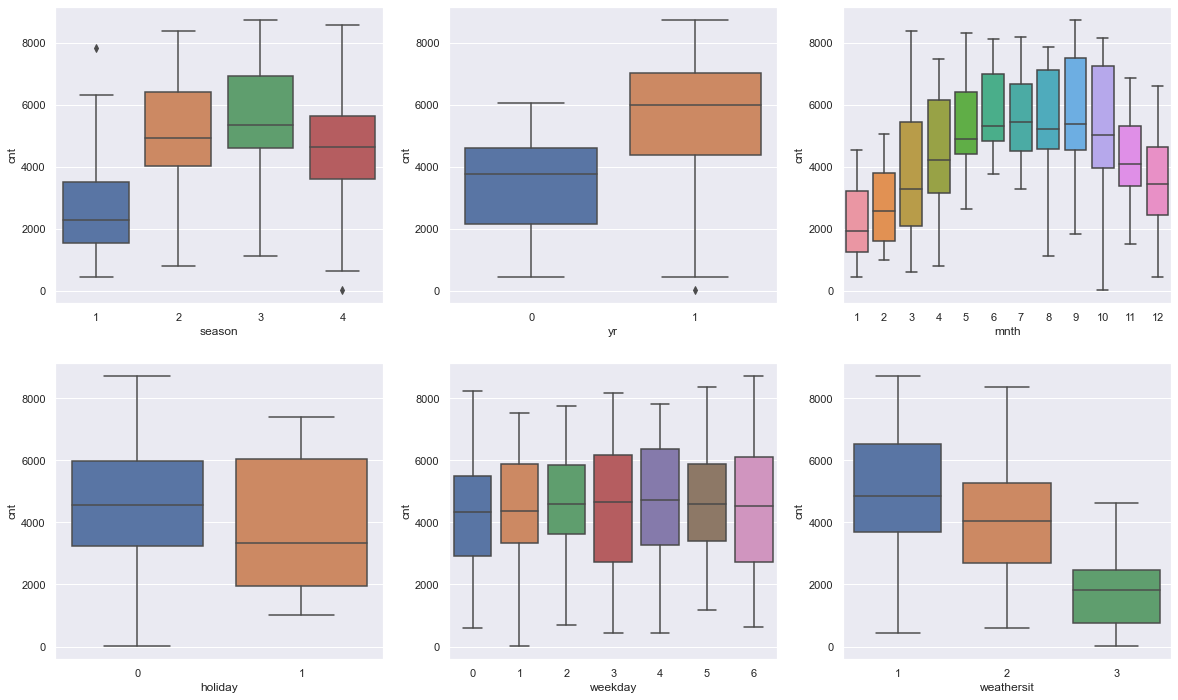

In [15]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikes)
plt.subplot(2,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bikes)
plt.subplot(2,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikes)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikes)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikes)
plt.subplot(2,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikes)
plt.show()

## Observations:
* Spring has substantially low demand and is reflected in the start of a year with demand being very low in Januray and February. 
* Year: Demand has indeed increased from 2018 to 2019.
* Month though has more granularity, season could be used more effectively.
* Demand is more on working days than on holidays by median but there is a lot of variance for working days. Possible cause can be investigated further.
* Median demand seems to be similar for all days of the week.
* Demand is lowest when it snows, clear days have the highest median demand.


## Conclusion:
* *Categorical*: 'holiday', 'season; and 'weathersit' can be considered for further analysis as they show significant difference in median
* *Continuous*: 'atemp' and 'hum' can be considered for further analysis

In [16]:
# Change numbers to string for some of the categorical variables

# print(map(bikes['season'],{1:"spring",2:"summer",3:"fall",4:"winter"}))

bikes.loc[bikes['season']==1,'season'] = "spring"
bikes.loc[bikes['season']==2,'season'] = "summer"
bikes.loc[bikes['season']==3,'season'] = "fall"
bikes.loc[bikes['season']==4,'season'] = "winter"

In [17]:
# Let's drop the first column from status df using 'drop_first = True'

status = pd.get_dummies(bikes['season'])

In [18]:
bikes = pd.concat([bikes, status], axis = 1)
# Drop 'season' as we have created the dummies for it

bikes.drop(['season'], axis = 1, inplace = True)

In [19]:
bikes.loc[bikes['yr']==0,'yr'] = "2018"
bikes.loc[bikes['yr']==1,'yr'] = "2019"


In [20]:
# Change numbers to string for some of the categorical variables

## Grouping 3&4 for snowy days and 1&2 for nosnow days

bikes.loc[bikes['weathersit']==1,'weathersit'] = "nosnow"
bikes.loc[bikes['weathersit']==2,'weathersit'] = "nosnow"
bikes.loc[bikes['weathersit']==3,'weathersit'] = "snow"
bikes.loc[bikes['weathersit']==4,'weathersit'] = "snow"

In [21]:
# Let's drop the first column from status df using 'drop_first = True'

status = pd.get_dummies(bikes['weathersit'])
status.head()

,nosnow,snow
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [22]:
bikes = pd.concat([bikes, status], axis = 1)
# Drop 'season' as we have created the dummies for it

bikes.drop(['weathersit'], axis = 1, inplace = True)

## Selct columns with identified variables

In [23]:
data = bikes[['cnt','atemp','windspeed','spring','holiday','snow','hum']]

In [24]:
data.head()

,cnt,atemp,windspeed,spring,holiday,snow,hum
0,985,18.18125,10.749882,1,0,0,80.5833
1,801,17.68695,16.652113,1,0,0,69.6087
2,1349,9.47025,16.636703,1,0,0,43.7273
3,1562,10.60610,10.739832,1,0,0,59.0435
4,1600,11.46350,12.522300,1,0,0,43.6957


## Train, Test Split

In [25]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)

## Rescaling features

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [27]:
num_vars = ['cnt','atemp','windspeed','hum']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [28]:
df_train.head()

,cnt,atemp,windspeed,spring,holiday,snow,hum
424,0.571560,0.520199,0.488095,1,0,0,0.454835
728,0.204096,0.200348,0.783361,1,0,0,0.253180
482,0.482973,0.391735,0.256657,0,0,0,0.262722
116,0.442936,0.651162,0.691384,0,0,0,0.790713
582,0.804303,0.828504,0.255176,0,0,0,0.513995


In [29]:
df_train.describe()

,cnt,atemp,windspeed,spring,holiday,snow,hum
count,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000
mean,0.519159,0.519077,0.395515,0.238569,0.027833,0.023857,0.492135
std,0.224910,0.212046,0.185596,0.426633,0.164658,0.152755,0.207170
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.364703,0.340778,0.263337,0.000000,0.000000,0.000000,0.336832
50%,0.521284,0.541742,0.364976,0.000000,0.000000,0.000000,0.491095
75%,0.693281,0.694251,0.502931,0.000000,0.000000,0.000000,0.637557
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
## Dividing to X and Y variables
y_train = df_train.pop('cnt')
X_train = df_train

## Model Building

In [31]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['atemp','spring','holiday','snow','hum']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [32]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     119.7
Date:                Wed, 21 Sep 2022   Prob (F-statistic):           6.29e-83
Time:                        00:00:32   Log-Likelihood:                 236.02
No. Observations:                 503   AIC:                            -460.0
Df Residuals:                     497   BIC:                            -434.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4028      0.030     13.639      0.0

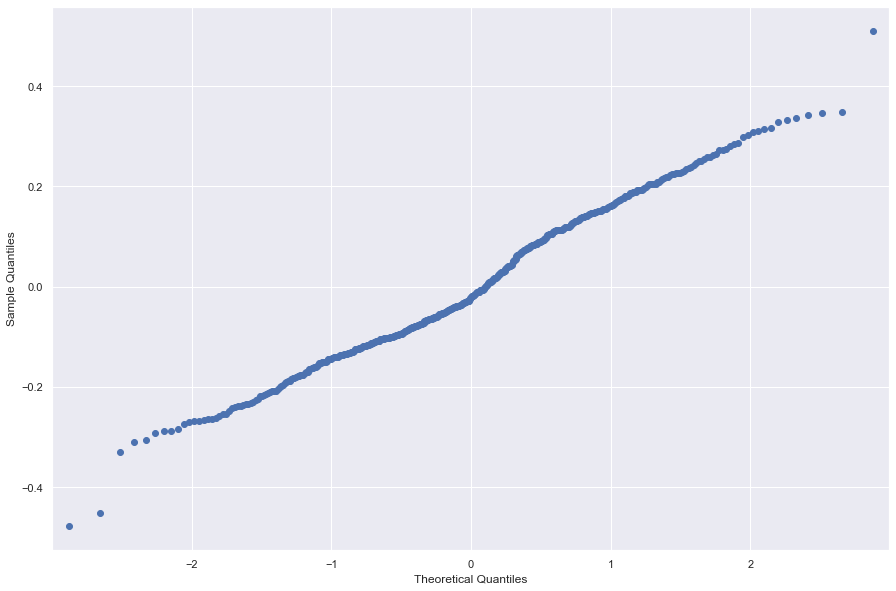

In [33]:
res = lr.resid
fig = sm.qqplot(res)
plt.show()

In [34]:
# check vif
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [35]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,atemp,6.52
5,hum,5.77
1,windspeed,4.14
2,spring,1.66
4,snow,1.18
3,holiday,1.03


### Applying on  Test data

In [36]:
num_vars = ['cnt','atemp','windspeed','hum']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [37]:
df_test.head()

,cnt,atemp,windspeed,spring,holiday,snow,hum
204,0.412333,0.939531,0.350165,0,0,0,0.356234
497,0.701335,0.664414,0.483634,0,0,0,0.395038
371,0.517602,0.409161,0.363494,1,0,0,0.326973
630,0.907156,0.577380,0.479199,0,0,0,0.228371
646,0.732858,0.471292,0.400572,0,0,0,0.678118


In [38]:
y_test = df_test.pop('cnt')
df_test.head()

,atemp,windspeed,spring,holiday,snow,hum
204,0.939531,0.350165,0,0,0,0.356234
497,0.664414,0.483634,0,0,0,0.395038
371,0.409161,0.363494,1,0,0,0.326973
630,0.577380,0.479199,0,0,0,0.228371
646,0.471292,0.400572,0,0,0,0.678118


In [40]:
X_test = df_test[['atemp','spring','holiday','snow','hum']]
X_test_lm = sm.add_constant(X_test)

In [41]:
# Making predictions using the fourth model

y_pred = lr.predict(X_test_lm)

## Model Evaluation

Text(0, 0.5, 'y_pred')

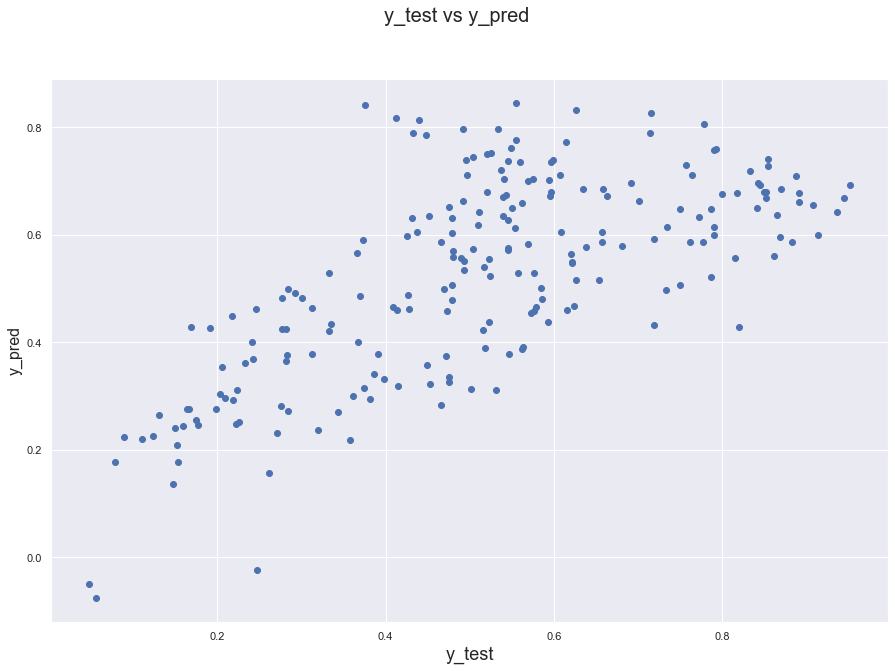

In [42]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [43]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred) # R-squared of 0.45 on test data is reasonable

0.4503801742512167